# Data Reading

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

In [2]:
import os
df = pd.read_csv('AWS-Dataset.csv')

In [4]:
df.shape

(100000, 15)

In [6]:
# df.drop('Time' , axis=1, inplace= True)
# df.drop('Air temperature (C)', axis=1, inplace= True)
# df.drop('Wind speed (Km/h)' , axis=1, inplace= True)
# df.drop('Air humidity (%)' ,axis=1,inplace=True)
# df.drop('Wind gust (Km/h)' , axis=1, inplace= True)
# df.drop('Pressure (KPa)',axis=1,inplace=True)
# df.drop('ph',axis=1,inplace=True)
# df.drop('rainfall',axis=1,inplace=True)
# df.drop('N',axis=1,inplace=True)
# df.drop('P',axis=1,inplace=True)
# df.drop('K',axis=1,inplace=True)

In [7]:
df.head()

,Soil Moisture,Temperature,Soil Humidity,Status
0,54,22,70,ON
1,12,20,40,OFF
2,34,26,35,ON
3,7,44,44,OFF
4,50,38,23,OFF


In [8]:
df.describe()

,Soil Moisture,Temperature,Soil Humidity
count,100000.000000,100000.000000,100000.000000
mean,45.484070,22.536100,45.016790
std,25.993998,13.251352,14.726676
min,1.000000,0.000000,20.000000
25%,23.000000,11.000000,32.000000
50%,45.000000,23.000000,45.000000
75%,68.000000,34.000000,58.000000
max,90.000000,45.000000,70.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Soil Moisture   100000 non-null  int64 
 1   Temperature     100000 non-null  int64 
 2    Soil Humidity  100000 non-null  int64 
 3   Status          100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [9]:
df.dtypes

Soil Moisture      int64
Temperature        int64
 Soil Humidity     int64
Status            object
dtype: object

In [10]:
df.nunique()

Soil Moisture     90
Temperature       46
 Soil Humidity    51
Status             2
dtype: int64

In [11]:
df.isnull().sum()

Soil Moisture     0
Temperature       0
 Soil Humidity    0
Status            0
dtype: int64

In [9]:
df['Status'] = df['Status'].map({'ON': 1, 'OFF': 0}).astype(int)

In [10]:
# df = df.fillna({'altitude': df['altitude'].mean()})

In [33]:
# imputer = IterativeImputer(random_state=46, verbose=True)
# data = imputer.fit_transform(df)
# data = pd.DataFrame(data, columns = df.columns)
# data.head()

# Data Wrangling

<Axes: >

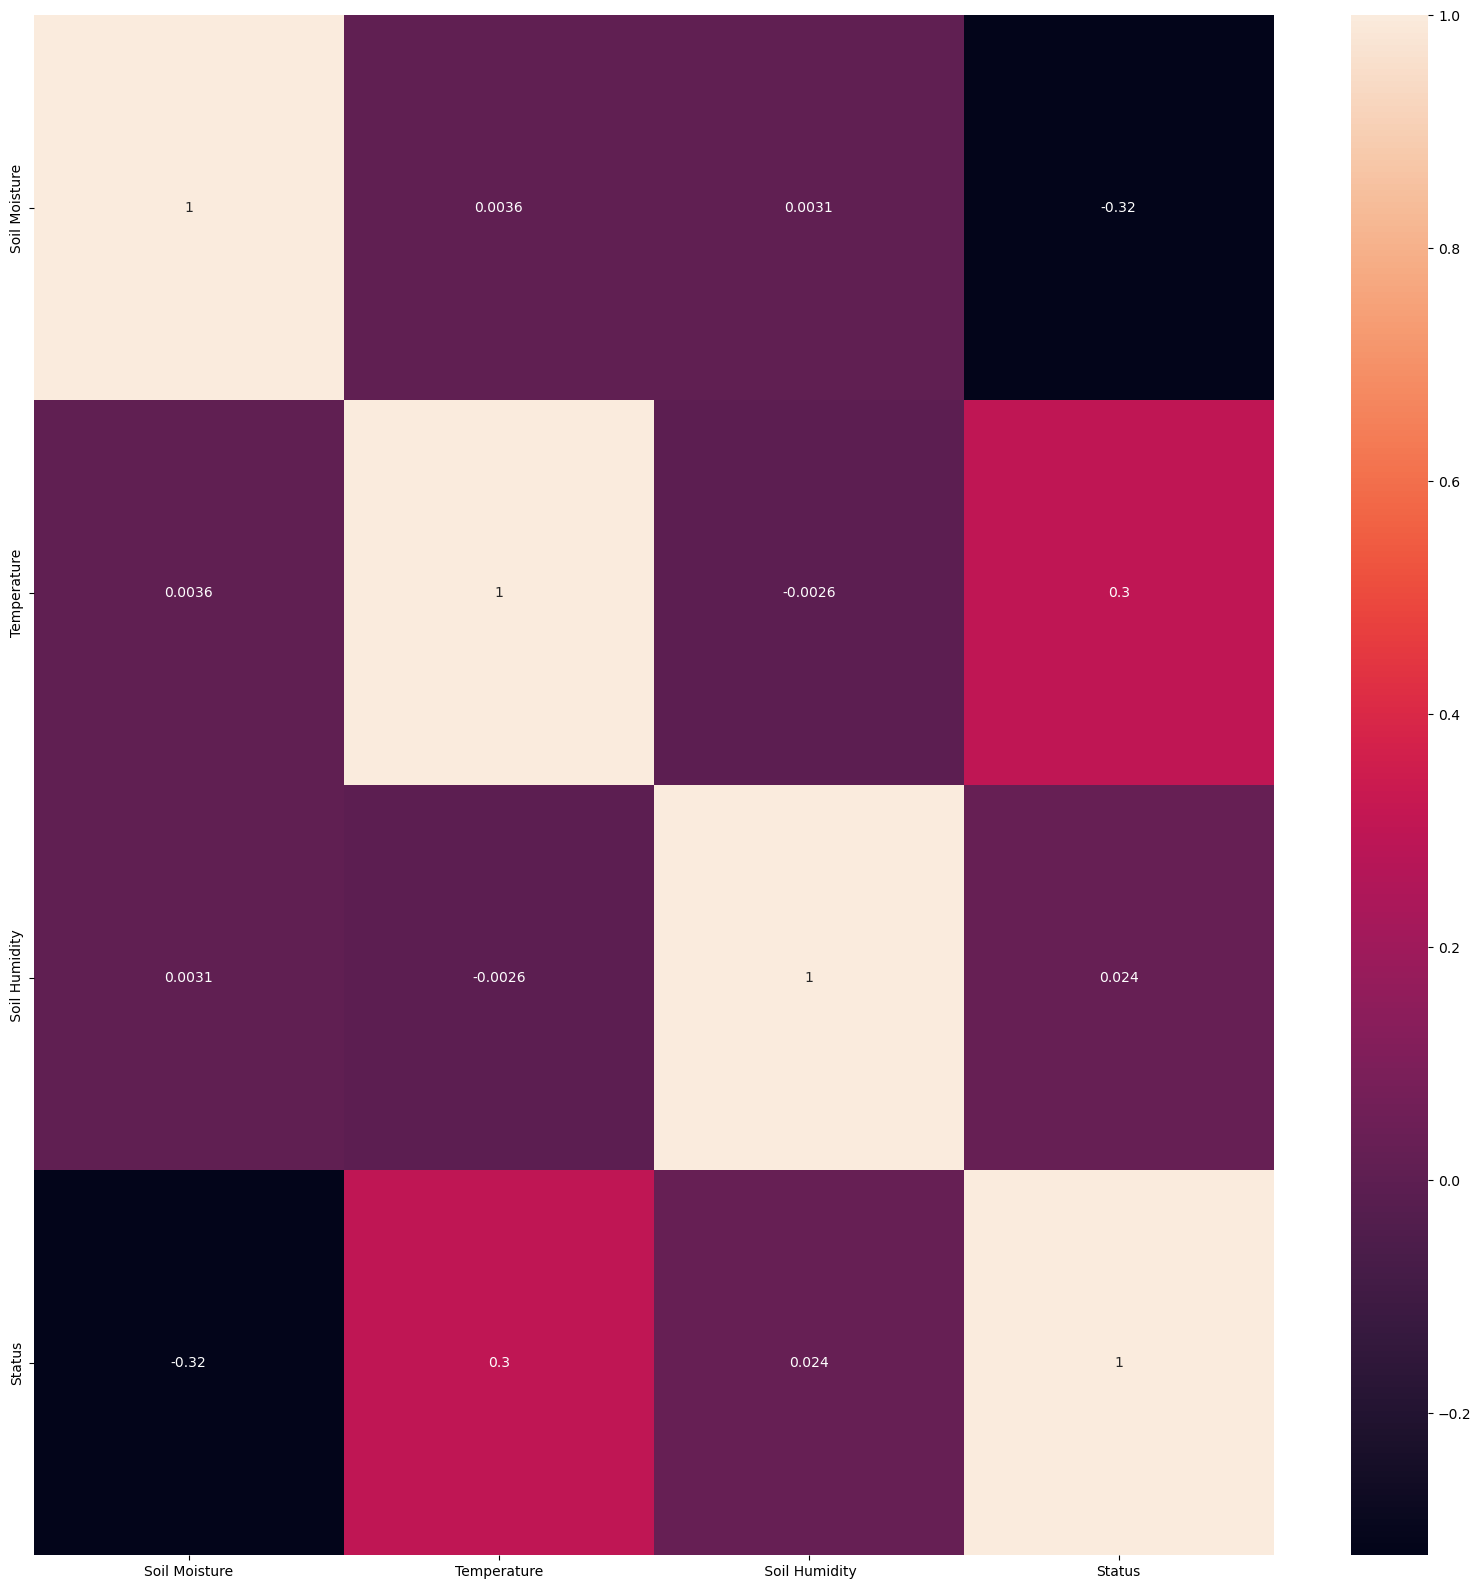

In [10]:
import seaborn as sns
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sdf = scaler.fit_transform(df.iloc[:,:-1])
# feature_names = scaler.get_feature_names_out()
scaled_df = pd.DataFrame(sdf, columns=feature_names)
scaled_df['Status'] = df['Status']
scaled_df.head()

,Soil Moisture,Temperature,Soil Humidity,Status
0,0.327613,-0.040456,1.696468,1
1,-1.288153,-0.191385,-0.340662,0
2,-0.441799,0.261401,-0.680183,1
3,-1.480506,1.619760,-0.069044,0
4,0.173731,1.166974,-1.495035,0


In [48]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the scaler to the data
# scaler.fit(df.iloc[:,:-1])

# # Transform the data
# sdf = scaler.transform(df.iloc[:,:-1])

# # Get the feature names
# feature_names = scaler.get_feature_names_out()

# # Create a new DataFrame with the scaled data
# scaled_df = pd.DataFrame(sdf, columns=feature_names)

# # Add the 'Irrigation' column back to the DataFrame
# scaled_df['Irrigation'] = df['Irrigation']

# # Print the first few rows of the DataFrame
# print(scaled_df.head())

In [39]:
scaled_df.isnull().sum()

Soil Moisture     0
Temperature       0
 Soil Humidity    0
Status            0
dtype: int64

C:\Users\vincetq\AppData\Local\Temp\ipykernel_8748\3452137136.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


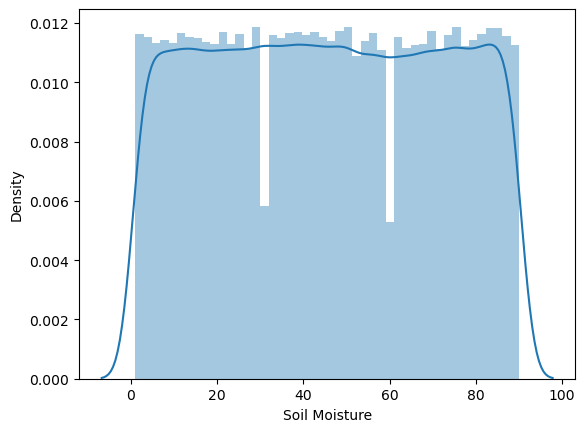

C:\Users\vincetq\AppData\Local\Temp\ipykernel_8748\3452137136.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


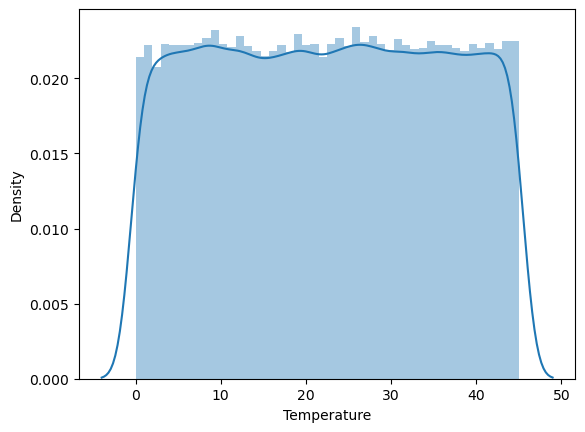

C:\Users\vincetq\AppData\Local\Temp\ipykernel_8748\3452137136.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


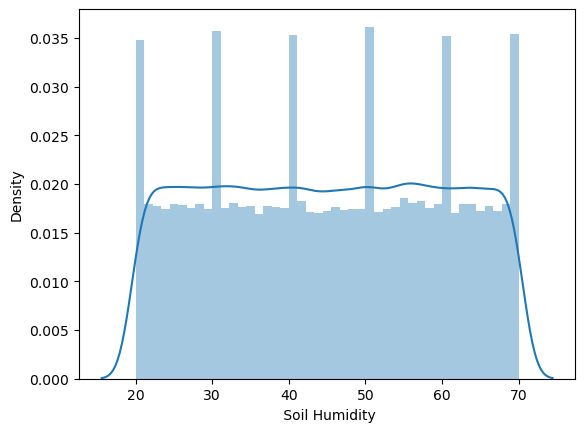

In [40]:
def distplots(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[:-1]:
  distplots(i)

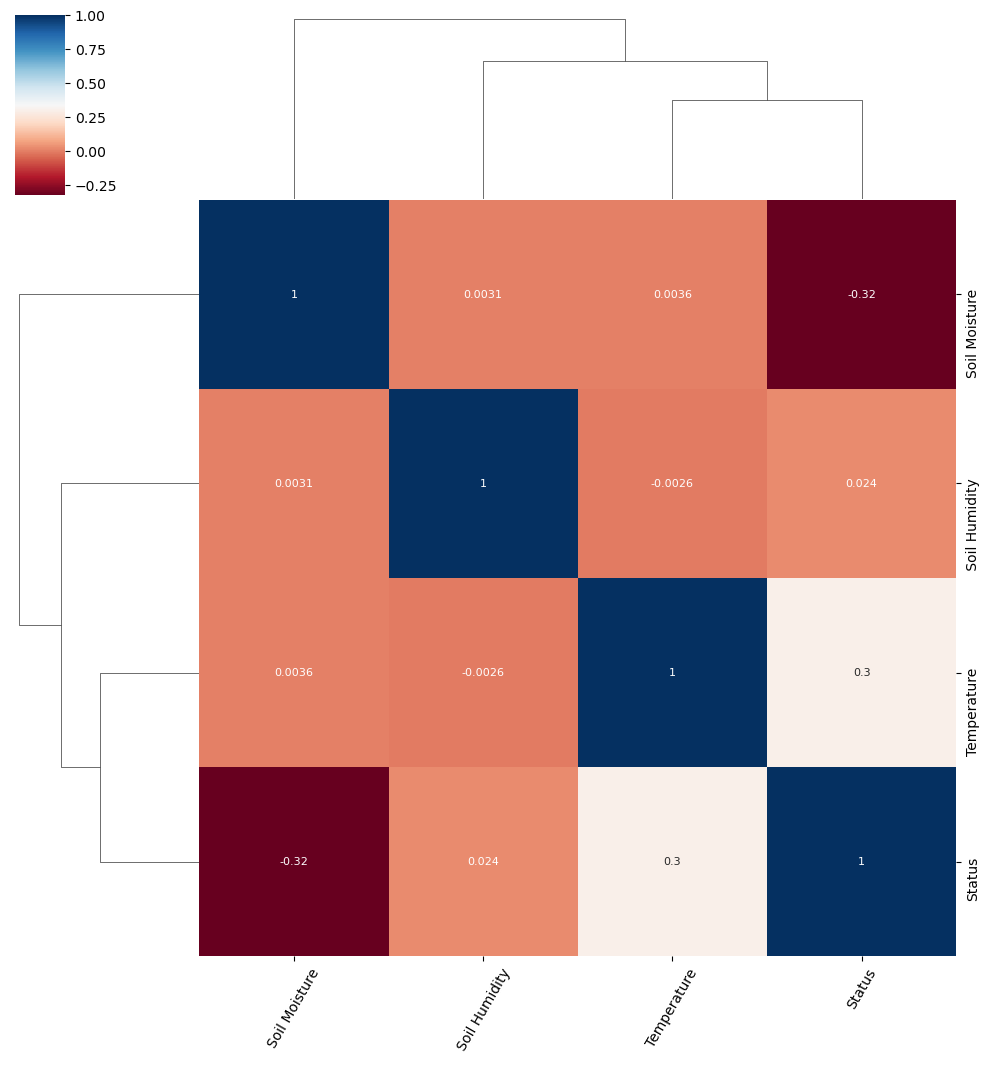

In [14]:
g = sns.clustermap(scaled_df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

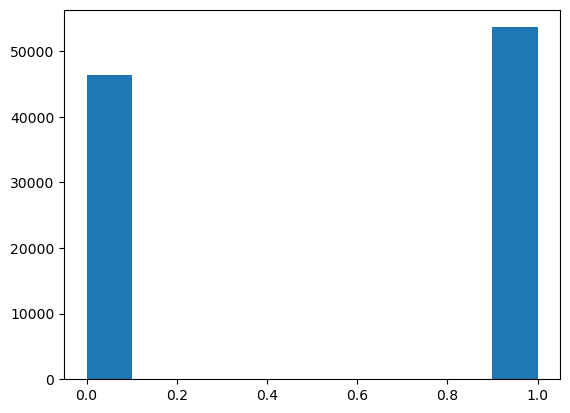

In [15]:
plt.hist(scaled_df['Status'])
plt.show()


In [41]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=7)

In [43]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn3 = KNeighborsClassifier(n_neighbors=6)
knn = model_knn3.fit(x_train, y_train)
# Predicting Test Set N=3
y_pred = knn.predict(x_test)
#Accuracy
accuracy_KNN = accuracy_score (y_test, y_pred)
print(f'Accuracy: {accuracy_KNN * 100:.2f}%')

Accuracy: 70.25%


In [19]:
# input_data = (55,45,10)

# input_data_as_array = np.asarray(input_data)
# input_data_reshaped = input_data_as_array.reshape(1,-1)
# std_data = scaler.transform(input_data_reshaped)

# prediction = model_knn3.predict(std_data)
# print(prediction)

In [44]:
import pickle

In [45]:
pickle.dump(knn ,open("classifier.pkl","wb"))

In [46]:
model_load = pickle.load(open("classifier.pkl","rb"))

In [51]:
input_data = (80,45,10)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
input_data_reshaped= scaler.fit_transform(input_data_reshaped)
std_data = scaler.transform(input_data_reshaped)
model_load.predict(std_data)

C:\Users\vincetq\.conda\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])